Este notebook, tiene como único objetivo analizar los ingresos ajustados por inflación en dicho sector

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from math import ceil

from scipy import stats

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

#### 1. Ingresos

In [91]:
df_9 = pd.read_excel('datasets/Telefonia_movil.xlsx', sheet_name='Ingresos')

In [92]:
df_9

,Año,Trimestre,Ingresos (miles de $),Periodo
0,2013,1,13135235,Ene-Mar 2013
1,2013,2,13970806,Abr-Jun 2013
2,2013,3,15235659,Jul-Sept 2013
3,2013,4,16218846,Oct-Dic 2013
4,2014,1,15938353,Ene-Mar 2013
5,2014,2,17680972,Abr-Jun 2014
6,2014,3,18976053,Jul-Sept 2014
7,2014,4,20012332,Oct-Dic 2014
8,2015,1,19337342,Ene-Mar 2015
9,2015,2,19945453,Abr-Jun 2015


##### 2. IPC

In [93]:
df_9b = pd.read_excel('datasets/internet.xlsx', sheet_name='IPC')

In [94]:
df_9b

,Año,Trimestre,Nivel general
0,2024,3,3.5
1,2024,3,4.2
2,2024,3,4.0
3,2024,2,4.6
4,2024,2,4.2
...,...,...,...
88,2017,2,1.4
89,2017,2,2.7
90,2017,1,2.4
91,2017,1,2.1


In [95]:
# Eliminar las primeras 3 filas usando drop 
df_9b = df_9b.drop(df_9b.index[:3]) 
# Resetear el índice después de eliminar las filas 
df_9b = df_9b.reset_index(drop=True)

In [96]:
df_9b

,Año,Trimestre,Nivel general
0,2024,2,4.6
1,2024,2,4.2
2,2024,2,8.8
3,2024,1,11.0
4,2024,1,13.2
...,...,...,...
85,2017,2,1.4
86,2017,2,2.7
87,2017,1,2.4
88,2017,1,2.1


In [97]:
df_9.isnull().sum()

Año                      0
Trimestre                0
Ingresos (miles de $)    0
Periodo                  0
dtype: int64

##### 1.5.9. Análisis de tendencia en la hoja: 'Ingresos'

In [98]:
df_9.head(1)

,Año,Trimestre,Ingresos (miles de $),Periodo
0,2013,1,13135235,Ene-Mar 2013


In [99]:
# Crear un ID para concatenar ambas tablas
df_9['ID'] = df_9.index + 1
df_9.head(4)

,Año,Trimestre,Ingresos (miles de $),Periodo,ID
0,2013,1,13135235,Ene-Mar 2013,1
1,2013,2,13970806,Abr-Jun 2013,2
2,2013,3,15235659,Jul-Sept 2013,3
3,2013,4,16218846,Oct-Dic 2013,4


In [100]:
# Convertir las columnas 'Año' y 'Trimestre' a string y luego eliminar caracteres no numéricos
df_9['Año'] = df_9['Año'].astype(str).str.extract('(\d+)', expand=False).astype(int)
df_9['Trimestre'] = df_9['Trimestre'].astype(str).str.extract('(\d+)', expand=False).astype(int)

# Crear la columna 'Fecha' como un índice de periodos trimestrales y convertir a timestamp para obtener el formato 'YYYY-MM-DD'
df_9['Fecha'] = pd.PeriodIndex(year=df_9['Año'], quarter=df_9['Trimestre'], freq='Q').to_timestamp()

In [101]:
df_9 = df_9.sort_values(by='Fecha', ascending=True)

In [102]:
df_9

,Año,Trimestre,Ingresos (miles de $),Periodo,ID,Fecha
0,2013,1,13135235,Ene-Mar 2013,1,2013-01-01
1,2013,2,13970806,Abr-Jun 2013,2,2013-04-01
2,2013,3,15235659,Jul-Sept 2013,3,2013-07-01
3,2013,4,16218846,Oct-Dic 2013,4,2013-10-01
4,2014,1,15938353,Ene-Mar 2013,5,2014-01-01
5,2014,2,17680972,Abr-Jun 2014,6,2014-04-01
6,2014,3,18976053,Jul-Sept 2014,7,2014-07-01
7,2014,4,20012332,Oct-Dic 2014,8,2014-10-01
8,2015,1,19337342,Ene-Mar 2015,9,2015-01-01
9,2015,2,19945453,Abr-Jun 2015,10,2015-04-01


In [103]:
# Por alguna razón que desconozco, se genera una fila extraña despúes del 2024-04-01. Por tal motivo se van a filtrar
df_9 = df_9[df_9['Fecha'] <= '2024-04-01']

In [104]:
# Crear un ID para concatenar ambas tablas
df_9b['ID'] = df_9b.index
df_9b.head(4)

,Año,Trimestre,Nivel general,ID
0,2024,2,4.6,0
1,2024,2,4.2,1
2,2024,2,8.8,2
3,2024,1,11.0,3


In [105]:
# Convertir las columnas 'Año' y 'Trimestre' a string y luego eliminar caracteres no numéricos
df_9b['Año'] = df_9b['Año'].astype(str).str.extract('(\d+)', expand=False).astype(int)
df_9b['Trimestre'] = df_9b['Trimestre'].astype(str).str.extract('(\d+)', expand=False).astype(int)

# Crear la columna 'Fecha' como un índice de periodos trimestrales y convertir a timestamp para obtener el formato 'YYYY-MM-DD'
df_9b['Fecha'] = pd.PeriodIndex(year=df_9b['Año'], quarter=df_9b['Trimestre'], freq='Q').to_timestamp()

In [106]:
df_9b = df_9b.sort_values(by='ID', ascending=False)

In [107]:
df_9b['Inflacion'] = df_9b['Nivel general'] / 100
df_9b['Inflacion_x'] = df_9b['Inflacion'] + 1

In [108]:
df_9b['Inflacion_Trimestral'] = df_9b.groupby(['Año', 'Trimestre'])['Inflacion_x'].cumprod()
df_9b

,Año,Trimestre,Nivel general,ID,Fecha,Inflacion,Inflacion_x,Inflacion_Trimestral
89,2017,1,1.6,89,2017-01-01,0.016,1.016,1.016000
88,2017,1,2.1,88,2017-01-01,0.021,1.021,1.037336
87,2017,1,2.4,87,2017-01-01,0.024,1.024,1.062232
86,2017,2,2.7,86,2017-04-01,0.027,1.027,1.027000
85,2017,2,1.4,85,2017-04-01,0.014,1.014,1.041378
...,...,...,...,...,...,...,...,...
4,2024,1,13.2,4,2024-01-01,0.132,1.132,1.365192
3,2024,1,11.0,3,2024-01-01,0.110,1.110,1.515363
2,2024,2,8.8,2,2024-04-01,0.088,1.088,1.088000
1,2024,2,4.2,1,2024-04-01,0.042,1.042,1.133696


In [109]:
# Agrupar por 'Año' y 'Trimestre' y filtrar la tercera fila de cada grupo
df_9b = df_9b.groupby(['Año', 'Trimestre']).nth(2).reset_index()

# Elimino las columnas que no quiero
df_9b = df_9b.drop(columns=['Inflacion', 'Inflacion_x', 'Nivel general'])

# Reiniciar la columna 'ID' desde 0
df_9b['ID'] = range(len(df_9b))

df_9b

,index,Año,Trimestre,ID,Fecha,Inflacion_Trimestral
0,87,2017,1,0,2017-01-01,1.062232
1,84,2017,2,1,2017-04-01,1.053875
2,81,2017,3,2,2017-07-01,1.050832
3,78,2017,4,3,2017-10-01,1.061116
4,75,2018,1,4,2018-01-01,1.066408
5,72,2018,2,5,2018-04-01,1.087364
6,69,2018,3,6,2018-07-01,1.140838
7,66,2018,4,7,2018-10-01,1.116009
8,63,2019,1,8,2019-01-01,1.118303
9,60,2019,2,9,2019-04-01,1.094837


In [110]:
# Reiniciar la columna 'ID' desde el número -4 para que el 0 coincida con el dataframe de inflación y así poder hacer un inner join. 
# Es cierto que se perderán los datos desde el 2014 al 2016 pero por motivos de tiempo se prefiere resignar estos datos con el fin de tener datos reales.
df_9['ID'] = range(-16, -16 + len(df_9))

df_9

,Año,Trimestre,Ingresos (miles de $),Periodo,ID,Fecha
0,2013,1,13135235,Ene-Mar 2013,-16,2013-01-01
1,2013,2,13970806,Abr-Jun 2013,-15,2013-04-01
2,2013,3,15235659,Jul-Sept 2013,-14,2013-07-01
3,2013,4,16218846,Oct-Dic 2013,-13,2013-10-01
4,2014,1,15938353,Ene-Mar 2013,-12,2014-01-01
5,2014,2,17680972,Abr-Jun 2014,-11,2014-04-01
6,2014,3,18976053,Jul-Sept 2014,-10,2014-07-01
7,2014,4,20012332,Oct-Dic 2014,-9,2014-10-01
8,2015,1,19337342,Ene-Mar 2015,-8,2015-01-01
9,2015,2,19945453,Abr-Jun 2015,-7,2015-04-01


In [111]:
df_9 = pd.merge(df_9, df_9b, on='ID', how='inner')

In [112]:
df_9.head(4)

,Año_x,Trimestre_x,Ingresos (miles de $),Periodo,ID,Fecha_x,index,Año_y,Trimestre_y,Fecha_y,Inflacion_Trimestral
0,2017,1,31205565,Ene-Mar 2017,0,2017-01-01,87,2017,1,2017-01-01,1.062232
1,2017,2,33509264,Abr-Jun 2017,1,2017-04-01,84,2017,2,2017-04-01,1.053875
2,2017,3,35711689,Jul-Sept 2017,2,2017-07-01,81,2017,3,2017-07-01,1.050832
3,2017,4,38110028,Oct-Dic 2017,3,2017-10-01,78,2017,4,2017-10-01,1.061116


In [113]:
df_9 = df_9[['Año_x', 'Trimestre_x', 'Ingresos (miles de $)', 'Inflacion_Trimestral', 'Fecha_x']]
df_9 = df_9.rename(columns={'Año_x': 'Año', 'Trimestre_x': 'Trimestre', 'Fecha_x': 'Fecha', 'Ingresos (miles de $)': 'Ingresos (miles de pesos)'})

In [114]:
# Ahora hay que componer la inflación trimestral
df_9['Inflacion_Compuesta'] = df_9['Inflacion_Trimestral'].cumprod() 

# Ahora se crea una columna llamada Ingresos_Reales que surgirá de descontar los ingresos diviendolo por el producto acumulativo de la inflación registrada
df_9['Ingresos_Reales (miles de pesos)'] = df_9['Ingresos (miles de pesos)'] / df_9['Inflacion_Compuesta'] 

df_9

,Año,Trimestre,Ingresos (miles de pesos),Inflacion_Trimestral,Fecha,Inflacion_Compuesta,Ingresos_Reales (miles de pesos)
0,2017,1,31205565,1.062232,2017-01-01,1.062232,2.937735e+07
1,2017,2,33509264,1.053875,2017-04-01,1.119459,2.993344e+07
2,2017,3,35711689,1.050832,2017-07-01,1.176363,3.035771e+07
3,2017,4,38110028,1.061116,2017-10-01,1.248257,3.053059e+07
4,2018,1,38733946,1.066408,2018-01-01,1.331151,2.909808e+07
5,2018,2,40653502,1.087364,2018-04-01,1.447446,2.808637e+07
6,2018,3,43280089,1.140838,2018-07-01,1.651301,2.620969e+07
7,2018,4,44026803,1.116009,2018-10-01,1.842866,2.389039e+07
8,2019,1,50246691,1.118303,2019-01-01,2.060883,2.438115e+07
9,2019,2,55338816,1.094837,2019-04-01,2.256332,2.452601e+07


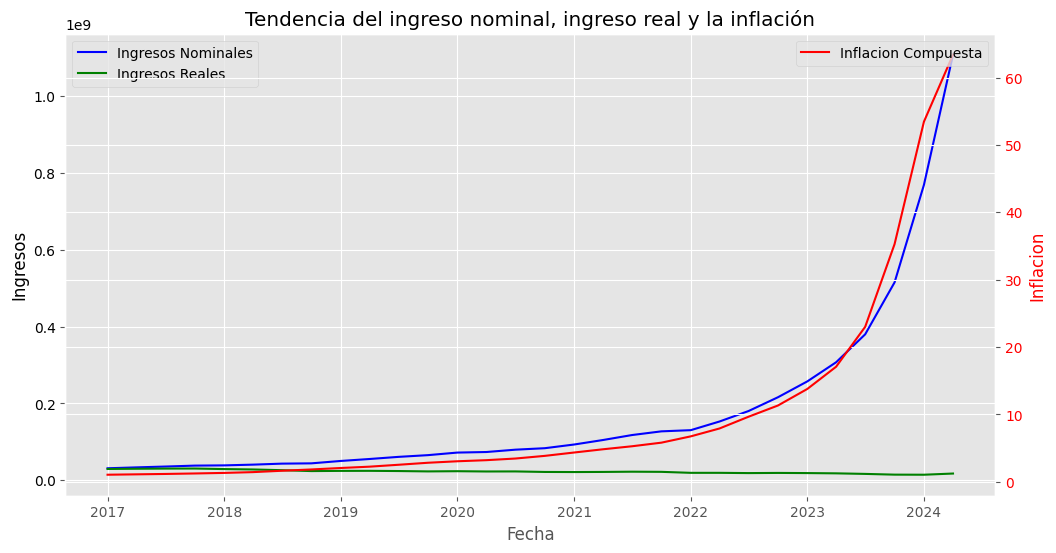

In [115]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotear los ingresos nominales y ajustados en el eje y primario
ax1.plot(df_9['Fecha'], df_9['Ingresos (miles de pesos)'], color='blue', label='Ingresos Nominales')
ax1.plot(df_9['Fecha'], df_9['Ingresos_Reales (miles de pesos)'], color='green', label='Ingresos Reales')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Ingresos', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Crear un segundo eje y para la inflación
ax2 = ax1.twinx()
ax2.plot(df_9['Fecha'], df_9['Inflacion_Compuesta'], color='red', label='Inflacion Compuesta')
ax2.set_ylabel('Inflacion', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Títulos y leyendas
plt.title('Tendencia del ingreso nominal, ingreso real y la inflación')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar la gráfica
plt.show()

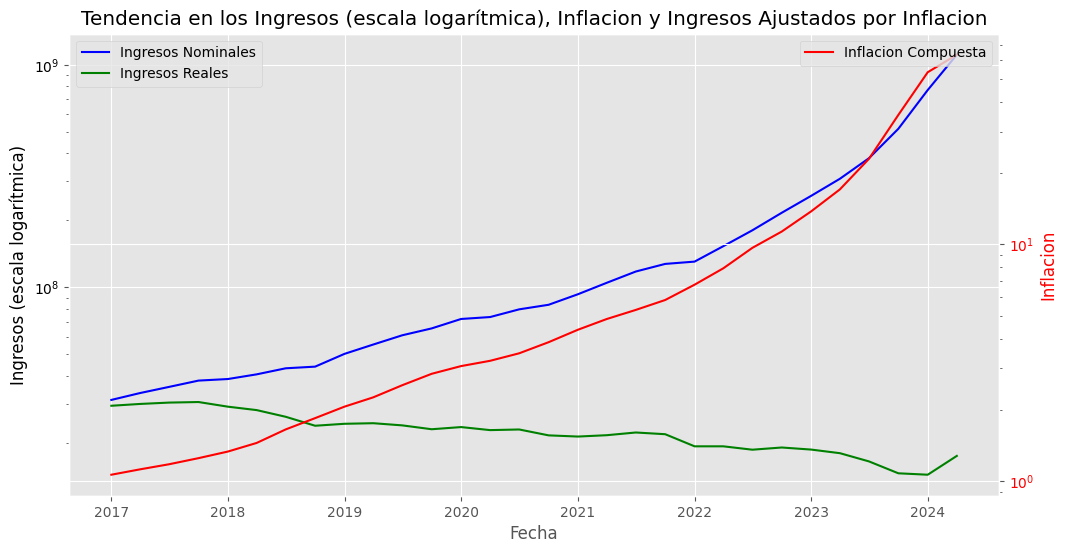

In [116]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotear los ingresos nominales y ajustados en el eje y primario con escala logarítmica
ax1.plot(df_9['Fecha'], df_9['Ingresos (miles de pesos)'], color='blue', label='Ingresos Nominales')
ax1.plot(df_9['Fecha'], df_9['Ingresos_Reales (miles de pesos)'], color='green', label='Ingresos Reales')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Ingresos (escala logarítmica)', color='black')
ax1.set_yscale('log')  # Establecer la escala logarítmica
ax1.tick_params(axis='y', labelcolor='black')

# Crear un segundo eje y para la inflación
ax2 = ax1.twinx()
ax2.plot(df_9['Fecha'], df_9['Inflacion_Compuesta'], color='red', label='Inflacion Compuesta')
ax2.set_ylabel('Inflacion', color='red')
ax2.set_yscale('log') # Establecer la escala logarítmica en el segundo eje y
ax2.tick_params(axis='y', labelcolor='red')

# Títulos y leyendas
plt.title('Tendencia en los Ingresos (escala logarítmica), Inflacion y Ingresos Ajustados por Inflacion')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar la gráfica
plt.show()

**Observaciones**: *en este gráfico logarítmico queda más claro el comparativo. El ingreso real se mantiene totalmente plano sin generar nada de riqueza durante los año del 2017 al 2024. Da la impresión que todos los esfuerzos se centraron en no perder contra la inflación. El aumento por la inflación es prácticamente igual al aumento por ingresos nominales.*

In [118]:
df_9['Ingresos (miles de pesos)'] = df_9['Ingresos (miles de pesos)'].round(3)
df_9['Ingresos_Reales (miles de pesos)'] = df_9['Ingresos_Reales (miles de pesos)'].round(3)
df_9['Inflacion_Trimestral'] = df_9['Inflacion_Trimestral'].round(3)
df_9['Inflacion_Compuesta'] = df_9['Inflacion_Compuesta'].round(3)

In [119]:
df_9['Ingresos (miles de pesos)'] = df_9['Ingresos (miles de pesos)'].apply(lambda x: f"{x:.3f}")
df_9['Ingresos_Reales (miles de pesos)'] = df_9['Ingresos_Reales (miles de pesos)'].apply(lambda x: f"{x:.3f}")
df_9['Inflacion_Trimestral'] = df_9['Inflacion_Trimestral'].apply(lambda x: f"{x:.3f}")
df_9['Inflacion_Compuesta'] = df_9['Inflacion_Compuesta'].apply(lambda x: f"{x:.3f}")

In [120]:
df_9.to_csv('dataset/ingresos_telefonia_movil.csv', index=False)